In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
a=pd.read_csv('spam.csv',error_bad_lines=False,encoding='latin-1')

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
a

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [59]:
a.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [60]:
a.rename(columns = {'v1':'status', 'v2':'text'}, inplace = True)

In [61]:
a

,status,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
a.shape

(5572, 2)

In [63]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [64]:
a.isna().sum()

status    0
text      0
dtype: int64

In [67]:
a

,status,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [263]:
a[a['status']=='spam']

,status,text,no_of_characters,no_of_words,no_of_sentence,new_text


In [68]:
a.drop_duplicates(keep=False,inplace=True)

In [69]:
a

,status,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
a.shape

(4888, 2)

In [74]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [75]:
a['status']=enc.fit_transform(a['status'])

In [76]:
a

,status,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [78]:
a['status'].value_counts()

0    4322
1     566
Name: status, dtype: int64

([<matplotlib.patches.Wedge at 0x273c666f348>,
 [Text(-1.0280156351445007, 0.3913870895909181, 'ham'),
  Text(1.0280156534666516, -0.39138704146603226, 'spam')],
 [Text(-0.5607358009879093, 0.21348386704959169, '88.4206'),
  Text(0.5607358109818098, -0.21348384079965396, '11.5794')])

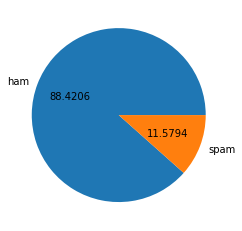

In [93]:
plt.pie(a['status'].value_counts(),labels=['ham','spam'],autopct='%0.4f')

In [94]:
#no of words,characters,sentences

In [95]:
import nltk

In [96]:
!pip install nltk

You should consider upgrading via the 'C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\BISHAL
[nltk_data]     SAHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
#words,characters,sentens in 1

In [100]:
a['no_of_characters']=a['text'].apply(len)

In [101]:
a

,status,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [104]:
a['no_of_words']=a['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [105]:
a

,status,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [106]:
a['no_of_sentence']=a['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [107]:
a

,status,text,no_of_characters,no_of_words,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [112]:
a['text'][0:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: text, dtype: object

In [113]:
a[['no_of_characters','no_of_words','no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,4888.000000,4888.000000,4888.000000
mean,77.338380,18.111293,1.925736
std,56.812841,12.930497,1.372808
min,3.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,59.000000,14.000000,1.000000
75%,112.000000,25.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
a[a['status']==0][['no_of_characters','no_of_words','no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,4322.000000,4322.00000,4322.000000
mean,69.559926,16.89727,1.797779
std,54.776039,13.02548,1.313880
min,3.000000,1.00000,1.000000
25%,34.000000,8.00000,1.000000
50%,52.000000,13.00000,1.000000
75%,88.000000,22.00000,2.000000
max,910.000000,220.00000,38.000000


In [116]:
a[a['status']==0].describe()

,status,no_of_characters,no_of_words,no_of_sentence
count,4322.0,4322.000000,4322.00000,4322.000000
mean,0.0,69.559926,16.89727,1.797779
std,0.0,54.776039,13.02548,1.313880
min,0.0,3.000000,1.00000,1.000000
25%,0.0,34.000000,8.00000,1.000000
50%,0.0,52.000000,13.00000,1.000000
75%,0.0,88.000000,22.00000,2.000000
max,0.0,910.000000,220.00000,38.000000


In [117]:
a[a['status']==1].describe()

,status,no_of_characters,no_of_words,no_of_sentence
count,566.0,566.000000,566.000000,566.000000
mean,1.0,136.734982,27.381625,2.902827
std,0.0,31.218620,7.160557,1.420243
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,7.000000


In [118]:
import seaborn as sns

<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

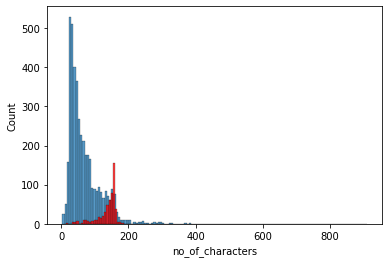

In [122]:
sns.histplot(a[a['status']==0]['no_of_characters'])
sns.histplot(a[a['status']==1]['no_of_characters'],color='red')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

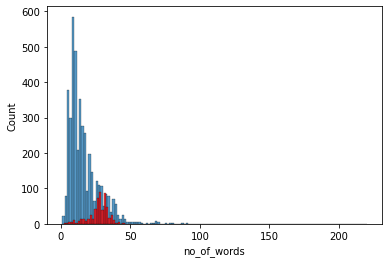

In [123]:
sns.histplot(a[a['status']==0]['no_of_words'])
sns.histplot(a[a['status']==1]['no_of_words'],color='red')

<AxesSubplot:xlabel='no_of_sentence', ylabel='Count'>

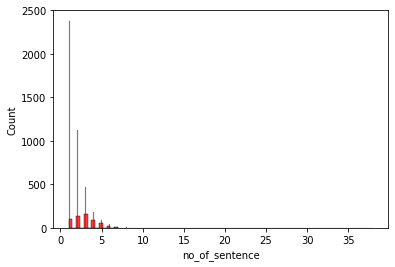

In [124]:
sns.histplot(a[a['status']==0]['no_of_sentence'])
sns.histplot(a[a['status']==1]['no_of_sentence'],color='red')

In [125]:
a

,status,text,no_of_characters,no_of_words,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [127]:
a.corr()

,status,no_of_characters,no_of_words,no_of_sentence
status,1.000000,0.378378,0.259472,0.257594
no_of_characters,0.378378,1.000000,0.965574,0.618655
no_of_words,0.259472,0.965574,1.000000,0.677265
no_of_sentence,0.257594,0.618655,0.677265,1.000000


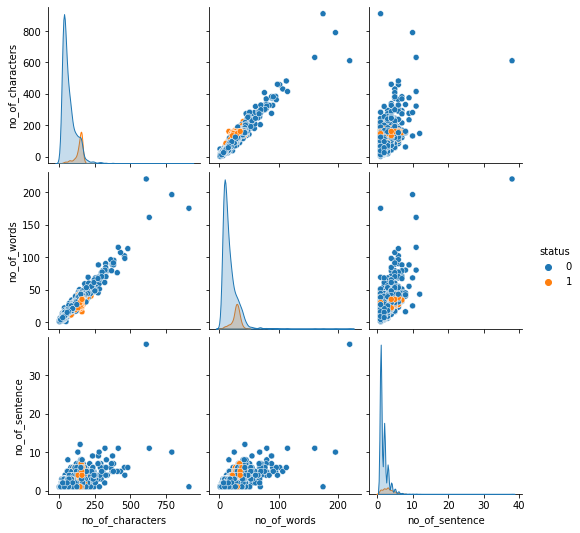

In [129]:
sns.pairplot(a,hue='status')

In [130]:
from nltk.stem.porter import PorterStemmer

In [132]:
ps=PorterStemmer()

In [156]:
ps.stem('bathing')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to C:\Users\BISHAL
[nltk_data]     SAHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    x=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    
    text=x[:]
    z=[]
    
    for i in text:
        z.append(ps.stem(i))
        
    return " ".join(z)
    

In [158]:
transform_text('Sneha yor are walking eaten forgot %% # is the')

'sneha yor walk eaten forgot'

In [159]:
a['new_text']=a['text'].apply(transform_text)

In [160]:
a

,status,text,no_of_characters,no_of_words,no_of_sentence,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [161]:
a['new_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [162]:
a['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [166]:
from wordcloud import WordCloud

In [167]:
from wordcloud import WordCloud

In [169]:
from wordcloud import WordCloud

In [264]:
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [265]:
spam_wc=wc.generate(a[a['status']==1]['new_text'].str.cat(sep=" "))

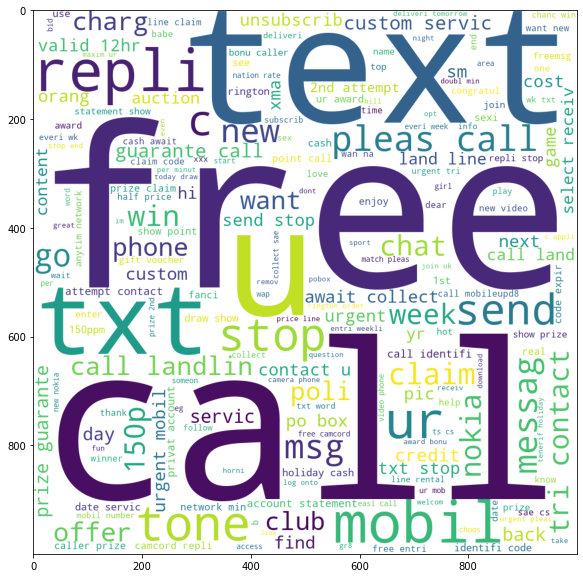

In [268]:
plt.figure(figsize=(15, 10))
plt.imshow(spam_wc)

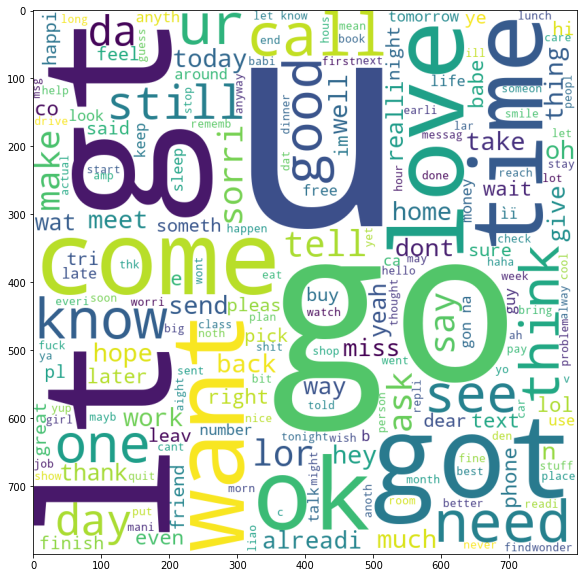

In [262]:
spam_wc=wc.generate(a[a['status']==0]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 10))
plt.imshow(spam_wc)

In [223]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [242]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [243]:
X=cv.fit_transform(a['new_text']).toarray()

In [244]:
X.shape

(4888, 6355)

In [245]:
Y=a['new_text'].values

In [246]:
y=a['status'].values

In [247]:
y[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [249]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [250]:
g=GaussianNB()
m=MultinomialNB()
b=BernoulliNB()

In [251]:
g.fit(X_train,y_train)
g.score(X_train,y_train)*100

91.99818140486474

In [252]:
m.fit(X_train,y_train)
m.score(X_train,y_train)*100

99.13616731075244

In [253]:
b.fit(X_train,y_train)
b.score(X_train,y_train)*100

97.95408047283473

In [254]:
y_predict=m.predict(X_test)

In [255]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [256]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [257]:
import pickle

In [258]:
pickle.dump(cv,open('SpamCountVectorizer.pkl','wb'))
pickle.dump(m,open('modelMulti.pkl','wb'))